# Analysis and visualization of Chris Claremont era X-Men comics

## Introduction

From 1975 to 1981, Chris Claremont helmed the X-Men and other Marvel mutant-related comics. His X-Men series is still one of the longest comic book runs by the same author. He and his fellow writers and artists expanded the mutants of the Marvel universe and created many of the defining characters, storylines and tropes associated with them.

There are over 400 comic issues in this era, spread across many teams and with over a thousand characters total. The goal of this project is to visualize the relationships between those characters. For that, we'll be scraping data from the marvel.fandom.com wiki, making a list of the correlation for each pair of characters and then turning that into a networkx.Graph which will be visualized with pyvis.

In [1]:
# Pandas and numpy will be useful throughout this notebook, so we'll import them at the top.
import pandas as pd
import numpy as np

## 1. Scrape and clean

In [2]:
import utils.scrape as scrape

In [3]:
list_of_issues = scrape.build_full_list_of_issues()
print(f"This contains {len(list_of_issues)} issues.")
list_of_issues[:3]

This contains 425 issues.


[{'title': 'X-Men Vol 1 94',
  'url': 'https://marvel.fandom.com/wiki/X-Men_Vol_1_94'},
 {'title': 'X-Men Vol 1 95',
  'url': 'https://marvel.fandom.com/wiki/X-Men_Vol_1_95'},
 {'title': 'X-Men Vol 1 96',
  'url': 'https://marvel.fandom.com/wiki/X-Men_Vol_1_96'}]

In [4]:
import utils.parse_issues as parse_issues

In [5]:
# To build the data, uncomment this:

# appearances_per_issue = parse_issues.build_full_table(list_of_issues)
# print(appearances_per_issue.head())
# appearances_per_issue.to_csv("data/table_of_appearances.csv")

# This is already saved and can be loaded from the file system from now on.

## 2. Preliminary analysis

In [6]:
import utils.process_appearances as process_appearances

Load the data from the CSV:

In [7]:
appearances_per_issue = pd.read_csv("data/table_of_appearances.csv", index_col=0)
print(appearances_per_issue.shape)
appearances_per_issue.head()

(1617, 414)


,character name,X-Men Vol 1 94,X-Men Vol 1 95,X-Men Vol 1 96,X-Men Vol 1 97,X-Men Vol 1 98,X-Men Vol 1 99,X-Men Vol 1 100,X-Men Vol 1 101,X-Men Vol 1 102,...,X-Force Vol 1 6,X-Force Vol 1 7,X-Force Vol 1 8,X-Force Vol 1 9,X-Force Vol 1 10,X-Force Vol 1 11,X-Force Vol 1 12,X-Force Vol 1 13,X-Force Vol 1 14,X-Force Vol 1 15
0,X-Men,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,Mentions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Colossus (Piotr Rasputin),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyclops (Scott Summers),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nightcrawler (Kurt Wagner),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Havok (Alexander Summers),Appearances,NaN,NaN,Appearances,Mentions,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The most prominent characters:

In [8]:
# Generate:
#char_stats = process_appearances.count_types_of_appearances(appearances_per_issue)
# Load from csv:
char_stats = pd.read_csv("data/character_stats.csv", index_col=0)
char_stats.head(12)

,character name,Appearances,Minor Appearances,Mentions,Total Appearances (Full and Minor),Appearances and Mentions (Full + Minor + Mentions)
0,X-Men,196,14,55,210,265
6,Storm (Ororo Munroe),184,15,10,199,209
2,Cyclops (Scott Summers),170,12,12,182,194
5,Wolverine (James Howlett),168,15,18,183,201
1,Colossus (Piotr Rasputin),161,22,11,183,194
3,Nightcrawler (Kurt Wagner),153,12,6,165,171
422,Cannonball (Samuel Guthrie),124,4,1,128,129
421,New Mutants,114,5,19,119,138
225,Shadowcat (Kitty Pryde),113,10,10,123,133
9,Professor X (Charles Xavier),111,19,70,130,200


### Statistical characteristics

In [9]:
char_stats.describe()

,Appearances,Minor Appearances,Mentions,Total Appearances (Full and Minor),Appearances and Mentions (Full + Minor + Mentions)
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,5.066790,0.481138,1.016698,5.547928,6.564626
std,15.702541,1.657505,3.378418,17.053399,19.212296
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,2.000000
75%,3.000000,0.000000,1.000000,3.000000,4.000000
max,196.000000,22.000000,70.000000,210.000000,265.000000


Interesting: 75% of characters in this data have under 3 full appearances.

This can be used to filter characters in the future.

<AxesSubplot:>

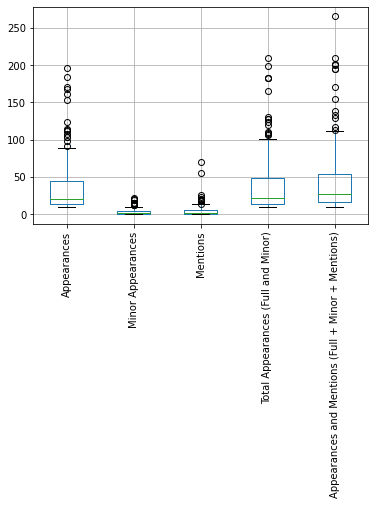

In [10]:
char_stats.loc[char_stats.Appearances >= 10, :].boxplot(rot=90)

Save the data, so we don't need to compute it again later.

In [11]:
char_stats.to_csv("data/character_stats.csv")

## 3. Filter the characters

1617 characters is way too many. If we were to graph this, the graph would look very messy, with a lot of edges. Not only that, this includes many characters that aren't very relevant.

Solution: filter by the number of appearances.

We could filter by some specific criteria like:

In [12]:
char_stats.loc[(char_stats["Total Appearances (Full and Minor)"] > 4) & (char_stats["Appearances"] >= 1), :]

,character name,Appearances,Minor Appearances,Mentions,Total Appearances (Full and Minor),Appearances and Mentions (Full + Minor + Mentions)
0,X-Men,196,14,55,210,265
6,Storm (Ororo Munroe),184,15,10,199,209
2,Cyclops (Scott Summers),170,12,12,182,194
5,Wolverine (James Howlett),168,15,18,183,201
1,Colossus (Piotr Rasputin),161,22,11,183,194
...,...,...,...,...,...,...
134,Vril-Rokk,3,2,0,5,5
11,John Proudstar,3,3,7,6,13
106,Angus MacWhirter,2,3,0,5,5
346,Death,2,4,2,6,8


But it should be enough to select the top 200 characters with the most full appearances.

In [13]:
characters_to_keep_idx = char_stats.sort_values(by="Appearances", ascending=False).head(200).index
characters_to_keep_idx # This is a series of the indexes we want to keep

Int64Index([   0,    6,    2,    5,    1,    3,  422,  421,  225,    9,
            ...
            1112,   15, 1149,  132,  683, 1209,  538,  852,   66,  448],
           dtype='int64', length=200)

In [14]:
# now apply that filter to the full table
appearances_per_issue_filtered = appearances_per_issue.iloc[characters_to_keep_idx]
appearances_per_issue_filtered

,character name,X-Men Vol 1 94,X-Men Vol 1 95,X-Men Vol 1 96,X-Men Vol 1 97,X-Men Vol 1 98,X-Men Vol 1 99,X-Men Vol 1 100,X-Men Vol 1 101,X-Men Vol 1 102,...,X-Force Vol 1 6,X-Force Vol 1 7,X-Force Vol 1 8,X-Force Vol 1 9,X-Force Vol 1 10,X-Force Vol 1 11,X-Force Vol 1 12,X-Force Vol 1 13,X-Force Vol 1 14,X-Force Vol 1 15
0,X-Men,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,Mentions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Storm (Ororo Munroe),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyclops (Scott Summers),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Wolverine (James Howlett),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Colossus (Piotr Rasputin),Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,Appearances,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Rejects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,Magus (Warlock's Father),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,Emmanuel Da Costa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Nick Fury,NaN,NaN,NaN,NaN,Appearances,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the statistics about this filtered data now.

In [15]:
filtered_stats = process_appearances.count_types_of_appearances(appearances_per_issue_filtered)
filtered_stats.describe()

,Appearances,Minor Appearances,Mentions,Total Appearances (Full and Minor),Appearances and Mentions (Full + Minor + Mentions)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,29.925000,2.445000,4.160000,32.370000,36.530000
std,35.776096,3.968086,7.998392,38.984768,43.908987
min,7.000000,0.000000,0.000000,7.000000,7.000000
25%,9.000000,0.000000,0.000000,10.000000,12.000000
50%,14.500000,1.000000,2.000000,17.000000,19.000000
75%,32.250000,3.000000,4.250000,35.500000,42.000000
max,196.000000,22.000000,70.000000,210.000000,265.000000


<AxesSubplot:>

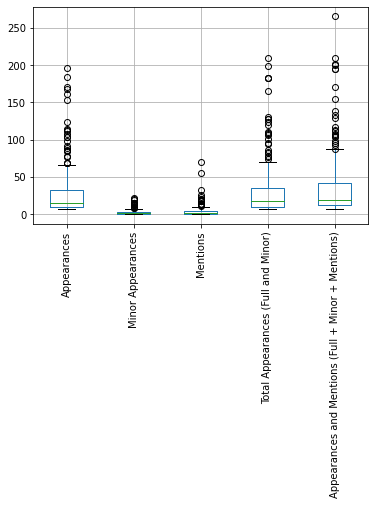

In [16]:
filtered_stats.boxplot(rot=90)

array([[<AxesSubplot:title={'center':'Appearances'}>,
        <AxesSubplot:title={'center':'Minor Appearances'}>],
       [<AxesSubplot:title={'center':'Mentions'}>,
        <AxesSubplot:title={'center':'Total Appearances (Full and Minor)'}>],
       [<AxesSubplot:title={'center':'Appearances and Mentions (Full + Minor + Mentions)'}>,
        <AxesSubplot:>]], dtype=object)

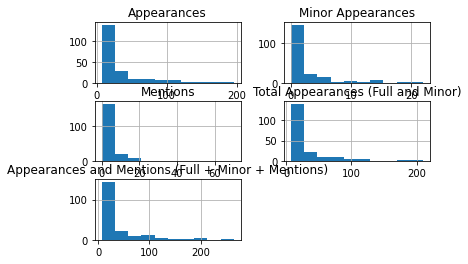

In [17]:
filtered_stats.hist()

## 4. Find correlations and build a list of edges

In [18]:
import utils.prepare_edges as prepare_edges

In [19]:
# to prepare:
# weights_df = prepare_edges.build_weights_df(appearances_per_issue_filtered)


# to read from csv:
weights_df = pd.read_csv("data/weights_df_filtered.csv", index_col=0)

print(weights_df.shape)
weights_df.head()

(200, 414)


,character name,X-Men Vol 1 94,X-Men Vol 1 95,X-Men Vol 1 96,X-Men Vol 1 97,X-Men Vol 1 98,X-Men Vol 1 99,X-Men Vol 1 100,X-Men Vol 1 101,X-Men Vol 1 102,...,X-Force Vol 1 6,X-Force Vol 1 7,X-Force Vol 1 8,X-Force Vol 1 9,X-Force Vol 1 10,X-Force Vol 1 11,X-Force Vol 1 12,X-Force Vol 1 13,X-Force Vol 1 14,X-Force Vol 1 15
0,X-Men,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Storm (Ororo Munroe),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cyclops (Scott Summers),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Wolverine (James Howlett),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Colossus (Piotr Rasputin),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
weights_df.to_csv("data/weights_df_filtered.csv")

### Build the correlation matrix.

A correlation matrix is a matrix where each entry represents the correlation between the corresponding column and row.

We can think of each character as a vector of the weights constructed in the weights dataframe above. Then we take the correlation for each pair.

In this context the correlation between Character A and Character B can be thought of as how likely it is to see Character A in a certain issue where Character B is present, and also how likely it is to *not* see Character A when Character B is *not* present. The correlation is symmetrical (corr(A,B) = corr(B,A)) and the result is a real number in [-1, +1].

In this context:
- A correlation of +1 means you *always* see character A and character B together. (A <=> B)
- A correlation of -1 means Character A is exclusively in all the comics Character B *isn't* and vice-versa. [(A <=> ~B) & (B <=> ~A)]

In [21]:
correlations = prepare_edges.calculate_correlations(weights_df)
print(correlations.shape)
correlations.head()

(200, 200)


character name,X-Men,Storm (Ororo Munroe),Cyclops (Scott Summers),Wolverine (James Howlett),Colossus (Piotr Rasputin),Nightcrawler (Kurt Wagner),Cannonball (Samuel Guthrie),New Mutants,Shadowcat (Kitty Pryde),Professor X (Charles Xavier),...,Zero,Avengers,Tower,Sybil (Oracle),Skullbuster,Rejects,Magus (Warlock's Father),Emmanuel Da Costa,Nick Fury,Project Wideawake
,,,,,,,,,,,,,,,,,,,,,
X-Men,1.000000,0.847002,0.245188,0.819834,0.767621,0.445168,-0.306452,-0.236008,0.257808,0.449128,...,-0.122703,0.065071,-0.134452,0.143012,0.065235,-0.138368,-0.023871,-0.007030,0.067436,0.043660
Storm (Ororo Munroe),0.847002,1.000000,0.291032,0.800715,0.768162,0.478614,-0.349224,-0.284443,0.219918,0.426131,...,-0.113388,0.080540,-0.125560,0.151558,0.047615,-0.125560,-0.026462,-0.070945,0.013957,0.030413
Cyclops (Scott Summers),0.245188,0.291032,1.000000,0.322945,0.313829,0.221175,-0.422314,-0.402350,-0.037676,0.224420,...,-0.084393,0.136666,0.154620,0.048784,-0.116194,0.154620,-0.091444,-0.092036,-0.023424,-0.040459
Wolverine (James Howlett),0.819834,0.800715,0.322945,1.000000,0.733659,0.430971,-0.379320,-0.330995,0.211219,0.364944,...,-0.065871,0.068445,-0.117031,0.163946,0.058219,-0.117031,-0.052629,-0.094660,0.090135,-0.036902
Colossus (Piotr Rasputin),0.767621,0.768162,0.313829,0.733659,1.000000,0.570647,-0.378607,-0.330370,0.302375,0.464359,...,-0.102193,0.080569,-0.115321,0.091101,0.002598,-0.115321,-0.008072,-0.017993,-0.060244,-0.034409


### Reshape this table to a list of edges.

networkx needs this data as a list of edges in the format [source, target, weight of the connection].

At the same time, also remove the edges from a character to themselves, because that's just always 1 and not interesting for this purpose.

In [22]:
edge_list = prepare_edges.build_edge_list(correlations)
print(edge_list.shape)
edge_list.head()

(39800, 3)


,source,target,correlation
1,X-Men,Storm (Ororo Munroe),0.847002
2,X-Men,Cyclops (Scott Summers),0.245188
3,X-Men,Wolverine (James Howlett),0.819834
4,X-Men,Colossus (Piotr Rasputin),0.767621
5,X-Men,Nightcrawler (Kurt Wagner),0.445168


In [23]:
edge_list.correlation.describe()

count    39800.000000
mean         0.010374
std          0.138859
min         -0.422314
25%         -0.048311
50%         -0.028638
75%          0.018890
max          1.000000
Name: correlation, dtype: float64

We want every node to have at least one edge. To assure that, let's keep the largest edge for each source.

In [24]:
largest_edges = prepare_edges.select_biggest_edges(edge_list)
largest_edges.head()

,source,target,correlation
1,X-Men,Storm (Ororo Munroe),0.847002
200,Storm (Ororo Munroe),X-Men,0.847002
414,Cyclops (Scott Summers),Beast (Henry McCoy),0.640845
600,Wolverine (James Howlett),X-Men,0.819834
801,Colossus (Piotr Rasputin),Storm (Ororo Munroe),0.768162


In [25]:
largest_edges.describe()

,correlation
count,200.000000
mean,0.709188
std,0.208947
min,0.222993
25%,0.566696
50%,0.753402
75%,0.878535
max,1.000000


In [26]:
largest_edges.sort_values("correlation", ascending=True)

,source,target,correlation
14591,N.Y.P.D.,Avengers,0.222993
38387,Avengers,Shi'ar Imperial Fleet,0.246086
13209,Stephanie Hunter,Professor X (Charles Xavier),0.261577
21034,N'astirh,Madelyne Pryor,0.268406
18827,Aleytys Forrester,Magneto (Max Eisenhardt),0.289115
...,...,...,...
24921,Angelo Macon,Wade Cole,1.000000
36983,Chosen,Lev,1.000000
36784,Lev,Chosen,1.000000
37983,Gammenon the Gatherer,Lev,1.000000


We also want to see the edges with a particular strong correlation.

We can adjust that threshold to tweak the final graph.

In [27]:
large_correlations = prepare_edges.select_edges_above_threshhold(edge_list, 0.3)
large_correlations

,source,target,correlation
1,X-Men,Storm (Ororo Munroe),0.847002
3,X-Men,Wolverine (James Howlett),0.819834
4,X-Men,Colossus (Piotr Rasputin),0.767621
5,X-Men,Nightcrawler (Kurt Wagner),0.445168
9,X-Men,Professor X (Charles Xavier),0.449128
...,...,...,...
39662,Nick Fury,Jubilee (Jubilation Lee),0.348734
39759,Nick Fury,S.H.I.E.L.D.,0.584241
39877,Project Wideawake,Valerie Cooper,0.411595
39940,Project Wideawake,Henry Gyrich,0.653555


Combine the edges above the threshold with the largest edges for each node:

In [28]:
print(largest_edges.shape[0], large_correlations.shape[0])
edges_to_graph = pd.concat([largest_edges, large_correlations])
edges_to_graph

200 1766


,source,target,correlation
1,X-Men,Storm (Ororo Munroe),0.847002
200,Storm (Ororo Munroe),X-Men,0.847002
414,Cyclops (Scott Summers),Beast (Henry McCoy),0.640845
600,Wolverine (James Howlett),X-Men,0.819834
801,Colossus (Piotr Rasputin),Storm (Ororo Munroe),0.768162
...,...,...,...
39662,Nick Fury,Jubilee (Jubilation Lee),0.348734
39759,Nick Fury,S.H.I.E.L.D.,0.584241
39877,Project Wideawake,Valerie Cooper,0.411595
39940,Project Wideawake,Henry Gyrich,0.653555


## 4. Build graph

In [29]:
import utils.visualization as visualization

In [30]:
G = visualization.make_nx_graph(edges_to_graph)

Color the communities using community_louvain:

In [31]:
visualization.partition_communities(G)

Set node sizes:

In [32]:
visualization.set_node_size(G, char_stats.loc[:, ["character name", "Appearances"]])

Finally, create the html file:

In [33]:
visualization.show_graph(G, physics_buttons=False)

## 5. Analyze Graph and Explore Data

In [34]:
import networkx as nx

In [35]:
centrality = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns=['Centrality'])
#centrality.set_index("Character", inplace=True)
centrality.head()

,Centrality
X-Men,0.060302
Storm (Ororo Munroe),0.050251
Cyclops (Scott Summers),0.050251
Beast (Henry McCoy),0.080402
Wolverine (James Howlett),0.060302


<AxesSubplot:>

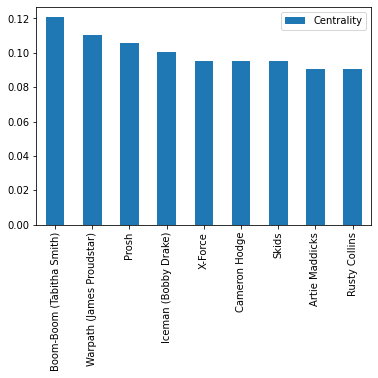

In [36]:
centrality.sort_values('Centrality', ascending=False)[0:9].plot(kind="bar")

In [37]:
in_betweenness = pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index', columns=['In Between Centrality'])
in_betweenness.head()

,In Between Centrality
X-Men,0.042903
Storm (Ororo Munroe),0.030239
Cyclops (Scott Summers),0.199639
Beast (Henry McCoy),0.013002
Wolverine (James Howlett),0.097622


<AxesSubplot:>

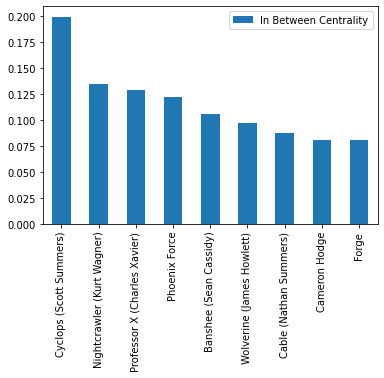

In [38]:
in_betweenness.sort_values('In Between Centrality', ascending=False)[:9].plot(kind="bar")

In [39]:
closeness = pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index', columns=['Closeness Centrality'])
closeness.head()

,Closeness Centrality
X-Men,0.261039
Storm (Ororo Munroe),0.259620
Cyclops (Scott Summers),0.281830
Beast (Henry McCoy),0.264288
Wolverine (James Howlett),0.284770


<AxesSubplot:>

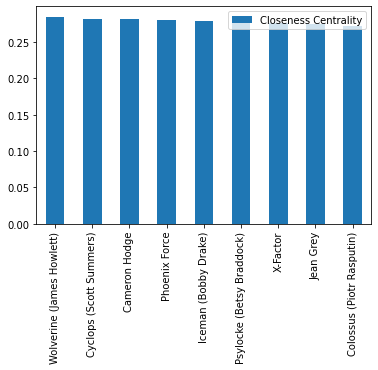

In [40]:
closeness.sort_values('Closeness Centrality', ascending=False)[:9].plot(kind="bar")

In [41]:
centrality.join(in_betweenness, how="outer")
centrality

,Centrality
X-Men,0.060302
Storm (Ororo Munroe),0.050251
Cyclops (Scott Summers),0.050251
Beast (Henry McCoy),0.080402
Wolverine (James Howlett),0.060302
...,...
Sybil (Oracle),0.040201
Skullbuster,0.040201
Rejects,0.015075
Magus (Warlock's Father),0.005025


## Final Thoughts

With the coloring provided by community_louvain, we can clearly see the main teams of heroes (X-Men, New Mutants, X-Factor, Excalibur, X-Force) in the graph visualization, as well as some of the villain teams (Freedon Force, Hellfire Club, Marauders, Reavers, Knights of Apocalypse) and teams of friends (space people/Starjammers).

There's not a lot of cross-over between the titles. A lot of characters are only connected to other characters you'd expect to see in the titles. Few characters have edges of different colors, connecting different nuclei. Notable exceptions: Professor X, Nightcrawler, Kitty Pryde, the X-Factor protegées.